# K-Means快速聚类算法

## 1.概述

聚类分析是无监督机器学习算法中最常用的，其目的是将数据划分成有意义或有用的组（簇）。具体例子：

1. 理解数据自然结构的聚类
    * 生物学：界-kingdom、门-phylum、纲-class、目-order、科-family、属-genus、种-species
    * 信息检索
    * 气候
    * 心理学和医学
    * 商业
2. 用于数据处理的聚类
    * 数据降维
    * 数据离散压缩：向量量化Vector Quantization
        1. 许多数据对象之间高度相似
        2. 某些信息丢失是可以接受的
        3. 希望大幅度压缩数据量
    * 有效地发现最近邻

## 2.核心概念

### 2.1.聚类分析

聚类分析仅在发现的描述对象和相关信息中将数据分组，它的目标是：组内对象相互之间是相似的（相关性），而不同组中的对象是不同的（不相关的），组内相似越大、组间区别越大、效果越好。

### 2.2.簇

簇就是分类结果中的类，实际上它没有明确的定义，并且它的划分并没有客观标准；簇的定义是不明确的，最好的定义是依赖数据特性和期望结果。聚类和其他将数据对象分组的技术相关，它可以看做一种分类，用类标号创建对象标记。

KNN是监督分类（Supervised Classification），由类标号已知的对象开发的模型，对新的、无标记的对象赋予类标号。聚类则是非监督分类（Unsupervised classification）——数据挖掘中不附加任何条件分类等价于监督分类。

### 2.3.聚类类型划分依据

簇划分的过程即为聚类，判断聚类算法类型主要考虑以下几个方面：

* 簇之间是否相互嵌套：
    * 划分聚类（Partitional Clustering）：简单讲数据对象集划分成不重叠的子集（簇），使每个数据对象在一个子集中。
    * 层次聚类（Hierarchinical Clustering）：嵌套簇的集簇、组织成一棵树。
* 簇之间是否互斥：
    * 互斥的（Exclusive）：每个对象指派到单独的簇中。
    * 重叠的（Overlapping）或非互斥（Non-Exclusive）：用来反映一个对象同时属于多个组（类）的事实。
        * 模糊聚类（Fuzzyclustering）：不明显划分某数据的簇，每个对象以0（绝对不属于）和1（绝对属于）的权值属于每个簇，簇就是模糊集。
        * 概率聚类：计算每个点属于每个簇的概率，这些概率之和必须等于1
* 簇是否覆盖完整数据集：
    * 完全聚类（Complete Clustering）：将每个对象指派到一个簇中。
    * 部分聚类（Partial Clustering）：略。

### 2.4.簇类型划分

聚类的目的是发现有用的对象组（簇），这里有用性由数据挖掘目标来定义。

* 明显分离的簇：该簇是对象集合，每个对象到同簇中每个对象的距离比不同簇中任意对象距离都相近（更相似），使用阀值来说明簇中所有对象相互之间必须充分接近。**数据必须包含相互原理的自然簇**。
* 基于原型的簇：该簇是对象集合，每个对象到定义该簇原型距离比其他簇的原型距离更近（更相似）。连续属性数据：簇的原型通常是质心——簇中所有点的平均值，质心无意义时，原型通常是中心点——簇中最有代表性的点，基于原型的簇看做基于中心的簇（Center-Based Cluster）
* 基于图的簇：对图标进行聚类，节点是对象，边代表对象之间联系，簇可以定义为连通分支（Connected Component）——相互连通但不与组外对象连通的组。基于图的簇重要例子是基于邻近的簇（Contiguity-Based Cluster）。
* 基于密度的簇：簇可以是稠密区域、并且被低密度环绕，通常有噪声或离群点时使用基于密度的簇定义。
* 共同性质的（概念簇）：把簇定义为有某种共同性质的对象的集合，这个包括前边所有簇定义。

最常用的聚类算法有三种：

1. **K-means**：K均值是基于原型、划分的聚类技术，试图发现用户指定个数（K）的簇（质心代表）。
2. **层次聚类**：将数据集划分为有层次包含的簇，这种聚类方法涉及一组密切相关的聚类技术；开始每个点作为一个单点簇，然后重复合并最靠近的，直到单个、包含所有点的簇（基于图、基于原型）。
3. **DBSCAN**：产生划分聚类的基于密度的聚类算法，簇的个数由算法自动确定，低密度区域为噪声。

## 3.K-Means快速聚类

### 3.1.定义

基于原型的聚类技术创建对象单层划分，最常用的是K均值聚类和K中心点聚类。

* K均值：K均值用质心定义原型（质心是一组点的均值）——适用于n维连续空间中的对象。
* K中心聚类：使用中心点定义原型（中心点是最具有代表性的点）——对象之间的邻近度衡量，可用于广泛数据——中心点必须是一个实际的点。

### 3.2.算法执行过程

#### 3.2.1.基本解释

K均值比较简单，选择K个初始质心，其中K是用户指定的参数（所期望的簇的个数）。每个点指派到最近质心，而指派到一个质心的点集为一个簇，然后根据指派到簇的点，更新每个簇的质心。重复指派和更新，知道簇不发生变化为止。

#### 3.2.2.算法伪代码

**K-Means快速聚类**

1. 选择K个点作为初始质心
2. 重复
3. 将每个点指派到最新的质心，形成K个簇
4. 重新计算每个簇的质心
5. 直到质心不再发生变化

对于邻近性函数和质心类型的某些组合，K均值总是收敛到一个解，即K到达一种状态，其中所有点都不会从一个簇转移到另一个，因此质心不再改变。

#### 3.2.3.算法执行细节

##### 1）距离衡量方法

**数据距离**

对于数据之间的距离而言，在欧式空间中常使用欧几里得距离，也就是常说的距离平方和开平方，基本公式如下：

$$d(x,y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$

除此，还有曼哈顿距离，也称为街道距离

$$d(x,y) = \sum_{i=1}^n(|{x_i - y_i}|)$$

不论欧式距离还是曼哈顿距离，都可视为闵可夫斯基距离的特例，它的距离公式为：

$$d(x,y) = \sqrt[n]{\sum_{i=1}^n (|x_i - y_i|)^n}$$

距离 n = 1 就是曼哈顿距离，n = 2 就是欧几里得距离，n 趋近于无穷时，就是切比雪夫距离。

**文本距离**

除了数据距离以外，距离的衡量还常见于文本数据之间，此时常用余弦相似性或杰卡德相似度来衡量，余弦相似性计算本质上就是计算余弦夹角

$$\cos\theta = \frac{\sum_{1}^n ( x_i \times y_i )}{\sqrt{\sum_1^n(x_i)^2} \times \sqrt{\sum_1^n(y_i)^2}}$$

##### 2）误差平方和SSE（Sum of the Squared Error, SSE）

此处引入机器学习算法中很重要的概念：误差平方和——又称为组内误差平方和，该概念在聚类和回归类算法中有广泛应用。

在相同K值情况下，聚类模型SSE越小越好，也是聚类算法最核心的优化条件。

##### 3）聚类目标函数和质心计算方法

| 邻近度函数 | 质心计算方法 | 目标函数 |
| --- | --- | :--- |
| 曼哈顿距离 | 中位数 | 最小化对象到簇质心的曼哈顿距离和 |
| 欧式距离 | 均值 | 最小化对象到其簇质心的欧式距离和 |
| 余弦夹角 | 均值 | 最大化对象与其簇质心的余弦相似度和 |

先定义聚类算法中的符号集

| 符号 | 指代对象 |
| --- | :--- |
| x | 数据集对象 |
| $C_i$ | 第i个簇 |
| $c_i$ | 簇$C_i$的质心 |
| c | 所有点的质心 |
| $m_i$ | 第i个簇中对象的个数 |
| m | 数据集中对象的个数 |
| K | 簇的个数 |

误差平方和的计算公式如下：

$$SSE = \sum_{i=1}^k \sum_{x \in C_i} (c_i - x) ^2$$

基本证明过程：

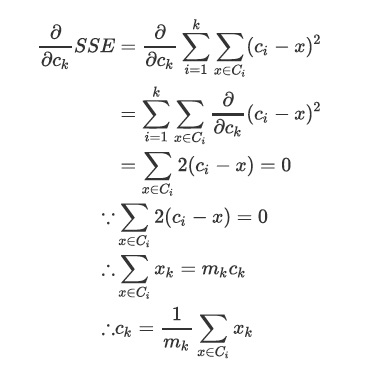

## 4.算法Python实践

### 4.1.K-Means快速聚类算法编写

此处针对DataFrame高级数据结构为例，在欧式距离定义的空间内，讨论如何手动写K-Means聚类算法。

> 注意：根据K-Means原理可知，聚类过程中各特征量纲应保持一致，以确保各特征对聚类结构影响权重相同，如果量纲不一致，则需要执行归一化/标准化。


In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
iris = pd.read_csv("iris.txt", header = None)
iris.shape

(150, 5)

In [2]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 随机选择 K-means 算法，需要写随机初始质心函数
import random
iris_min = iris.iloc[:,:4].min()
iris_max = iris.iloc[:,:4].max()
iris_mid = (iris_min + iris_max) / 2
iris_ran = (iris_max - iris_min) / 2
'''
然后利用 numpy 中的 random 函数随机抽样，此处使用 numpy.random.random 函数随机抽样
'''
np.random.RandomState(123)
iris_cent_o = np.random.random((2,4))
iris_cent = iris_cent_o * list(iris_ran) + list(iris_mid)
iris_cent

array([[7.17946696, 3.52480074, 4.18112764, 2.41123688],
       [6.72904759, 3.5772563 , 5.47575908, 2.23179781]])

In [4]:
iris_ran

0    1.80
1    1.20
2    2.95
3    1.20
dtype: float64

In [5]:
iris_max

0    7.9
1    4.4
2    6.9
3    2.5
dtype: float64

In [6]:
iris_min

0    4.3
1    2.0
2    1.0
3    0.1
dtype: float64

In [7]:
## 进一步，根据此编写自动生成随机质心的函数，筛选随机质心，同样假定输入数据为最后一列标签，其余为特征列，格式依旧为DataFrame

def randCent(dataSet, k):
    n = dataSet.shape[1]
    data_min = dataSet.iloc[:, :n-1].min()
    data_max = dataSet.iloc[:, :n-1].max()
    data_mid = (data_min + data_max) / 2
    data_ran = (data_max - data_min) / 2
    data_cent_o = np.random.random((k, n-1))
    data_cent = data_cent_o * list(data_ran) + list(data_mid)
    return data_cent


In [8]:
iris_cent = randCent(iris, 3)
iris_cent

array([[7.05207689, 4.21240157, 4.34273873, 2.34424583],
       [6.76738882, 3.98464109, 6.67048925, 2.41832544],
       [7.03538239, 4.10315071, 6.72131917, 2.46506503]])

In [9]:
"""
定义一个两个长度相同的数组之间的欧式计算距离，在不直接应用计算距离计算结果，
只比较距离远近的情况下，可以用距离平方和代替距离进行比较，化简开平方运算，
从而减少函数计算量。
"""

def distEclud(arrayA, arrayB):
    dist_o = arrayA - arrayB
    return np.sum(np.power(dist_o, 2), axis = 1)

distEclud(iris.iloc[0, :4].values, iris_cent)

array([17.575621585700905, 35.71408719905074, 37.55645303931613],
      dtype=object)

In [10]:
"""
设定距离 array 各元素的索引为簇的编号，可使用 np.where 函数来寻找最短距离对应的索引
"""
q = distEclud(iris.iloc[0, :4].values, iris_cent)
np.where(q == q.min())

(array([0], dtype=int64),)

In [11]:
np.where(q == q.min())[0]

array([0], dtype=int64)

In [22]:
m = iris.shape[0]
n = iris.shape[1]
clusterAssment = np.zeros((m, 3))
iris_cent

array([[7.05207689, 4.21240157, 4.34273873, 2.34424583],
       [6.76738882, 3.98464109, 6.67048925, 2.41832544],
       [7.03538239, 4.10315071, 6.72131917, 2.46506503]])

In [13]:
"""
然后执行迭代，计算没点到中心点之间的距离，并记录最短距离判定它所属的簇
"""
clusterAssment[:, 0] = np.inf
clusterAssment[:, 1:3] = -1
for i in range(m):
    dist = distEclud(iris.iloc[i, :n-1].values, iris_cent)
    clusterAssment[i, 0] = dist.min()
    clusterAssment[i, 1] = np.where(dist == dist.min())[0]

In [14]:
clusterAssment

array([[17.57562159,  0.        , -1.        ],
       [19.35885391,  0.        , -1.        ],
       [20.41327179,  0.        , -1.        ],
       [19.92907199,  0.        , -1.        ],
       [17.84355665,  0.        , -1.        ],
       [13.59111263,  0.        , -1.        ],
       [19.51132962,  0.        , -1.        ],
       [17.54996953,  0.        , -1.        ],
       [22.01341112,  0.        , -1.        ],
       [18.98667502,  0.        , -1.        ],
       [15.67086708,  0.        , -1.        ],
       [17.85225254,  0.        , -1.        ],
       [20.23811846,  0.        , -1.        ],
       [24.59583858,  0.        , -1.        ],
       [16.08740786,  0.        , -1.        ],
       [13.72456041,  0.        , -1.        ],
       [15.86530361,  0.        , -1.        ],
       [17.15677242,  0.        , -1.        ],
       [13.16119597,  0.        , -1.        ],
       [16.24078373,  0.        , -1.        ],
       [14.97121253,  0.        , -1.   

In [15]:
## 预先将比较列的值设置为 -1，因此任何时候都会发生下一次迭代，簇的划分是否发生变化可使用 all 进行判断
(clusterAssment[:,1] == clusterAssment[:,2]).all()

False

In [18]:
a = np.array([1,2,3])
b = 2
print(a > b)
print((a > b).any())
print((a > b).all())

[False False  True]
True
False


In [30]:
## 质心更新方法
clusterDf = pd.DataFrame(clusterAssment)
dfTemp = pd.concat([iris.iloc[:, n-1], clusterDf], axis = 1, ignore_index = True)
dfTemp.head()

,0,1,2,3
0,Iris-setosa,0.0,0.0,0.0
1,Iris-setosa,0.0,0.0,0.0
2,Iris-setosa,0.0,0.0,0.0
3,Iris-setosa,0.0,0.0,0.0
4,Iris-setosa,0.0,0.0,0.0


In [31]:
## cent_df = dfTemp.groupby(by = n).mean()
## cent_df ## 运行报错

In [32]:
## kMeans 的完整函数
def kMeans(dataSet, k, distMeas = distEclud, createCent=randCent):
    m = dataSet.shape[0]
    n = dataSet.shape[1]
    centroids = createCent(dataSet, k)
    clusterAssment = np.zeros((m, 3))
    clusterAssment[:, 0] = np.inf
    clusterAssment[:, 1:3] = -1
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis = 1, ignore_index=True)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            dist = distMeas(dataSet.iloc[i, :n-1].values, centroids)
            result_set.iloc[i,n] = dist.min()
            result_set.iloc[i,n+1] = np.where(dist == dist.min())[0]
        clusterChanged = not (result_set.iloc[:,-1] == result_set.iloc[:, -2]).all()
        if clusterChanged:
            cent_df = result_set.groupby(n+1).mean()
            centroids = cent_df.iloc[:,:n-1].values
            result_set.iloc[:, -1] = result_set.iloc[:, -2]
    return centroids, result_set

算法注意点：

1. 设置统一操作对象 result_set
2. 判断质心是否发生改变条件：不是某点距离新的质心距离变短，而是某点新的距离向量中最短分量的位置是否变化，质心变化后是否归属另外的簇。
3. 合并DataFrame后索引值为n的列
4. 质心和类别一一对应